# **Mapping Sea Surface Temperature Anomalies to Observe Potential El Niño Conditions**

Author: Julie Sanchez, NASA JPL PO.DAAC

## **Summary**

- El Niño-Southern Oscillation (ENSO) is a climate pattern in the Pacific Ocean that has two phases: El Niño (warm/wet phase) and La Niña (cold/dry phase). ENSO has global impacts on wildfires, weather, and ecosystems. We have been experiencing La Niña conditions for the last 2 and a half years. The last El Niño event occurred in 2015/2016 and a weak El Niño event was also experienced during the winter of 2018/2019.

- This tutorial uses the SST anomaly variable derived from a MUR climatology dataset - [MUR25-JPL-L4-GLOB-v04.2](https://podaac.jpl.nasa.gov/dataset/MUR25-JPL-L4-GLOB-v04.2) (average between 2003 and 2014). This tutorial uses the PO.DAAC Downloader which downloads data to your local computer and uses the data to run a notebook using python. The following code produces the sea surface temperature anomalies (SSTA) over the Pacific Ocean. 

## **Requirements**
### 1. Earthdata Login

- An Earthdata Login account is required to access data, as well as discover restricted data, from the NASA Earthdata system. Thus, to access NASA data, you need Earthdata Login. Please visit https://urs.earthdata.nasa.gov to register and manage your Earthdata Login account. This account is free to create and only takes a moment to set up.

### 2. netrc File

- You will need a `.netrc` file containing your NASA Earthdata Login credentials in order to execute the notebooks. A `.netrc` file can be created manually within text editor and saved to your home directory. For additional information see: [Authentication for NASA Earthdata tutorial](https://nasa-openscapes.github.io/2021-Cloud-Workshop-AGU/tutorials/02_NASA_Earthdata_Authentication.html).

### 3. PO.DAAC Data Downloader

- To download the data via command line, this tutorial uses PO.DAAC's Data Downloader. The downloader can be installed using [these instructions](https://podaac.github.io/tutorials/quarto_text/DataSubscriberDownloader.html) The Downloader is useful if you need to download PO.DAAC data once in a while or prefer to do it “on-demand”. The Downloader makes no assumptions about the last time run or what is new in the archive, it simply uses the provided requests and downloads all matching data. 


## **Learning Objectives**

- Introduction to the PO.DAAC Data Downloader 

- Learn how to plot the SSTA for the ENSO 3.4 Region and a timeseries

## **Download Data in the Command Line using the PO.DAAC Data Downloader**
In your terminal, go to the folder you want to download the files to -- this will be important to remember. You will need to put your path name in the code below. Copy and paste each line (below) into your terminal. If you have all the prerequisites, the files will download to your folder:

    podaac-data-downloader -h

    podaac-data-subscriber -c MUR25-JPL-L4-GLOB-v04.2 -d ./data/MUR25-JPL-L4-GLOB-v04.2 --start-date 2022-12-1T00:00:00Z -ed 2023-04-24T23:59:00Z -d .

## **Import Packages**

In [ ]:
# Import packages 
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import matplotlib.ticker as mticker
import netCDF4 as nc
import numpy as np
import datetime as dt
import glob
import hvplot.xarray
import pandas as pd

Input your folder directory where you used the Downloader to store the data

In [ ]:
dir = '/Users/your_user_name/folder_name/'

## **Open and Plot Sea Surface Temperature Anomalies**

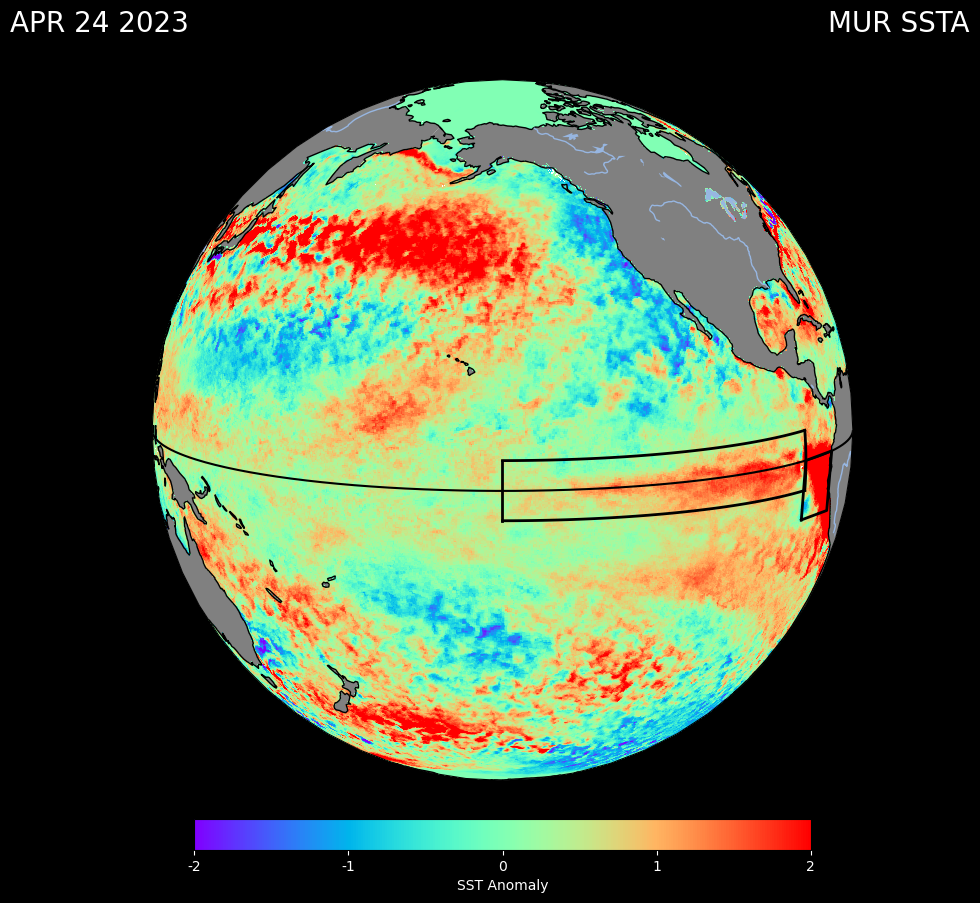

In [3]:
# Read the April 24 2023 NetCDF file
ds = xr.open_dataset(dir +'20230424090000-JPL-L4_GHRSST-SSTfnd-MUR25-GLOB-v02.0-fv04.2.nc')

# Extract the required variables
lon = ds['lon']
lat = ds['lat']
sst_anomaly = ds['sst_anomaly']


# Create the figure
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(-150, 10))


# Plot the sst_anomaly data with vmin and vmax
pcm = ax.pcolormesh(ds.lon, ds.lat, ds.sst_anomaly[0], transform=ccrs.PlateCarree(), cmap='rainbow', vmin=-2, vmax=2)


# Plot the equator line
ax.plot(np.arange(360), np.zeros((360)), transform=ccrs.PlateCarree(), color='black')


# Define the El Niño 1 + 2 region
enso_bounds_lon = [-90, -80, -80, -90, -90]
enso_bounds_lat = [-10, -10, 0, 0, -10]
# Plot the Enso region box
ax.plot(enso_bounds_lon, enso_bounds_lat, transform=ccrs.PlateCarree(), color='black', linewidth=2)


# Define the El Niño 3 region
enso_bounds_lon2 = [-150, -90, -90, -150, -150]
enso_bounds_lat2 = [-5, -5, 5, 5, -5]
# Plot great circle equations for Enso region 3 (accounts for the curve)
for i in range(4):
    circle_lon = np.linspace(enso_bounds_lon2[i], enso_bounds_lon2[i+1], 100)
    circle_lat = np.linspace(enso_bounds_lat2[i], enso_bounds_lat2[i+1], 100)
    ax.plot(circle_lon, circle_lat, transform=ccrs.PlateCarree(), color='black', linewidth=2)


# Add coastlines and gridlines
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, facecolor='gray')
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)


#Set tick locations and labels for the colorbar
cbar = plt.colorbar(pcm, ax=ax, orientation='horizontal', pad=0.05, fraction=0.04)
cbar.set_label('SST Anomaly', color = 'white')
cbar.set_ticks([-2, -1, 0, 1, 2])
cbar.set_ticklabels([-2, -1, 0, 1, 2]) 
cbar.ax.tick_params(color='white')
cbar.ax.xaxis.set_ticklabels(cbar.ax.get_xticks(), color='white')
cbar.ax.yaxis.set_ticklabels(cbar.ax.get_yticks(), color='white')


# Add white text on top left and right
fig.text(0.02, 0.95, 'APR 24 2023', color='white', fontsize=20, ha='left', va='top')
fig.text(0.98, 0.95, 'MUR SSTA', color='white', fontsize=20, ha='right', va='top')


# #Background set to black
fig.set_facecolor('black')


plt.show()

## **Plot a Time Series of MUR SSTA**

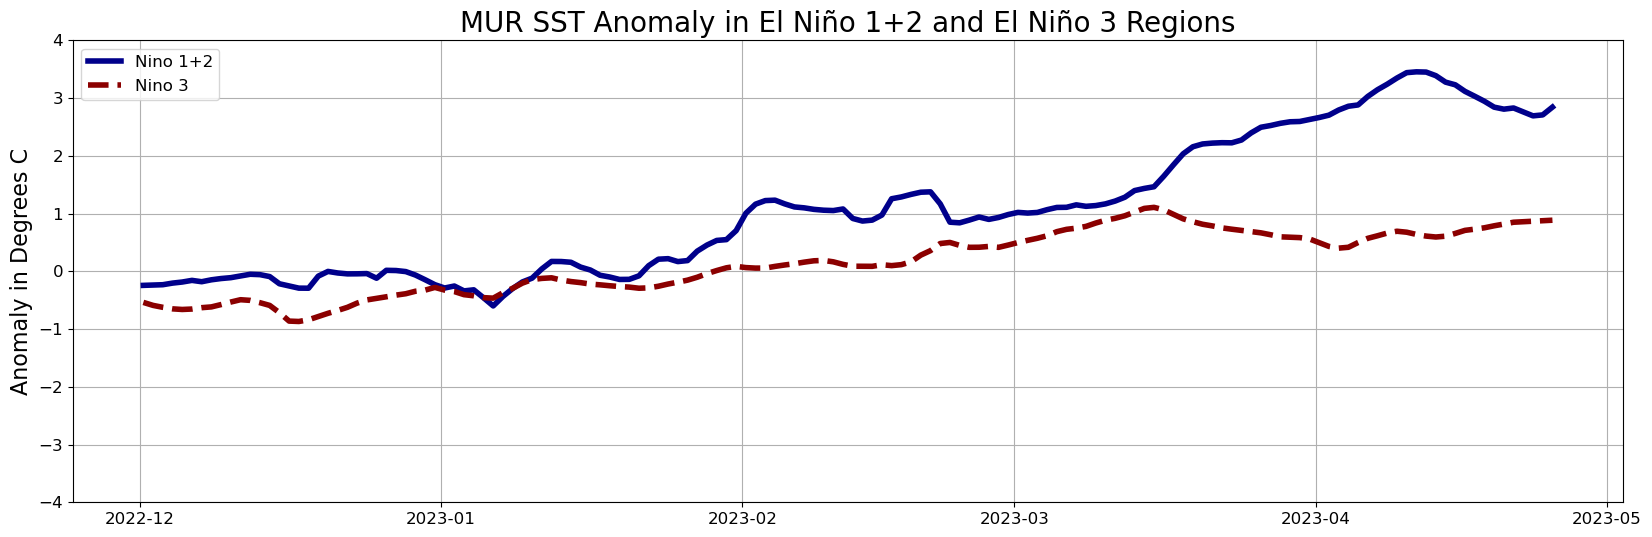

In [4]:
# Open data from December to April
ds2 = xr.open_mfdataset(dir + '20*.nc*', combine='by_coords')

# Grab the time values
times = ds2.time.values

# Select the El Niño 1+2 region
subset_ds = ds2.sel(lat=slice(-10, 0)).sel(lon=slice(-90, -80))

# Select ssta for El Niño 1+2 region
data = subset_ds.sst_anomaly.values
data_means = [np.nanmean(step) for step in data]

# Select the El Niño 3 region
subset_ds2 = ds2.sel(lat=slice(-5, 5)).sel(lon=slice(-150, -90)) 
data2 = subset_ds2.sst_anomaly.values
data_means2 = [np.nanmean(step) for step in data2]

# Plot the figure with labels
fig = plt.figure(figsize=(20,6))
plt.title('MUR SST Anomaly in El Niño 1+2 and El Niño 3 Regions', fontsize=20)
plt.ylabel('Anomaly in Degrees C', fontsize=16)
plt.tick_params(labelsize=12) 
plt.grid(True)

plt.plot(times, data_means, color='darkblue', linewidth=4, label='Nino 1+2')
plt.plot(times, data_means2[:len(times)], color='darkred', linewidth=4, linestyle='--', label='Nino 3')

plt.ylim(-4, 4)

# Add legend with labels
plt.legend(fontsize=12)  

plt.show()
